In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy import stats
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
import random
from random import shuffle
from sklearn.cluster import KMeans

In [2]:
def marca_base(Perc, x):
    if x >= Perc[(len(Perc)-1)]:
        return len(Perc) +1
    else:
        for i in range(len(Perc)):
            if x < Perc[i]:
                return i + 1

In [3]:
#/Users/felipesantos/Desktop/BootcampNY/ProjetoCasas
df = pd.read_csv('./train.csv')

In [4]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
284,285,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,179200
981,982,60,RL,98.0,12203,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,336000
1263,1264,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,180500
603,604,160,FV,30.0,3182,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,151000


(black line) median= 163000.0
(red line) mean= 180921.0


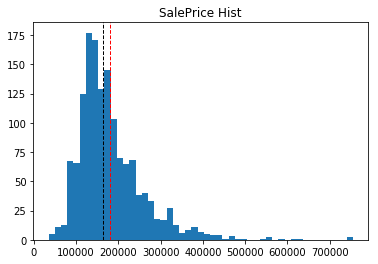

In [5]:
aux = plt.hist(df.SalePrice, bins='auto')
plt.title('SalePrice Hist')
plt.axvline(df.SalePrice.median(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df.SalePrice.mean(), color='red', linestyle='dashed', linewidth=1)
print('(black line) median= '+str(round(df.SalePrice.median(),0)))
print('(red line) mean= '+str(round(df.SalePrice.mean(),0)))

(black line) median= 12.0
(red line) mean= 12.0


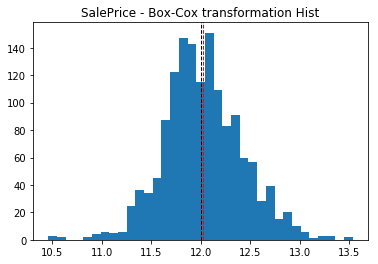

In [6]:
log_response = pd.Series(np.log(df.SalePrice))
aux = plt.hist(log_response, bins='auto')
plt.title('SalePrice - Box-Cox transformation Hist')
plt.axvline(log_response.median(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(log_response.mean(), color='red', linestyle='dashed', linewidth=1)
print('(black line) median= '+str(round(log_response.median(),0)))
print('(red line) mean= '+str(round(log_response.mean(),0)))

In [7]:
colunas_type = list(df.dtypes)[1:-2]
colunas_description = list(df.columns)[1:-2]

#    

-------------------
GrLivArea
#NAs= 0

R2= 0.5021486502718042

Scatter Drop any NA


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


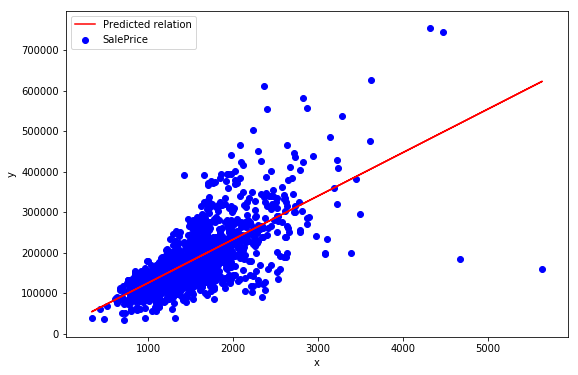

In [8]:
variavel='GrLivArea'
ols = linear_model.LinearRegression()
X = df[variavel].reshape(-1,1)
Y = df.SalePrice
ols.fit(X, Y)
print('-------------------')
print(variavel)
print('#NAs= '+str(df[variavel].isnull().sum()))
print('')
print('R2= '+str(ols.score(X, Y)))
plt.figure(figsize=(9, 6))
plt.plot(X, ols.predict(X), c='r', lw=1.5, label='Predicted relation')
plt.scatter(X, Y, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
print('')
print('Scatter Drop any NA')
plt.show()

In [9]:
Perc = list(np.percentile(df.SalePrice, [10, 20, 30, 40, 50, 60, 70, 80, 90]) )

In [10]:
df['SalePrice_percentil'] = [marca_base(Perc, x) for x in df.SalePrice]

In [11]:
aux = pd.DataFrame(df.SalePrice_percentil.value_counts()).reset_index().sort_values('index', ascending=True)
aux.columns = ['percentil', 'SalePrice_percentil']

In [12]:
aux_na = pd.DataFrame(df.isnull().sum(), columns=['conta_NA']).sort_values('conta_NA', ascending=False)#.reset_index().rename(columns={'index':'feature'})

In [13]:
lista_na = list(aux_na.head(19).T.columns)

#   

-------------------
#NAs= 8
MasVnrType
AxesSubplot(0.125,0.125;0.62x0.755)


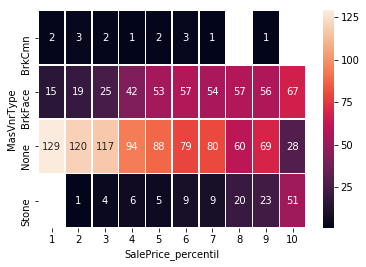

In [14]:
variavel = 'MasVnrType'
agg_dict = {'Id' : 'count'}
heatmap = df.groupby([variavel,'SalePrice_percentil']).agg(agg_dict).copy()
heatmap.reset_index(inplace= True)
heatmap = heatmap.pivot(variavel,'SalePrice_percentil', 'Id').copy()
print('-------------------')
print('#NAs= '+str(df[variavel].isnull().sum()))
print(variavel)
print(sns.heatmap(heatmap, linewidths=.5, fmt='g',annot=True) )

-------------------
#NAs= 8
MasVnrType
AxesSubplot(0.125,0.125;0.62x0.755)


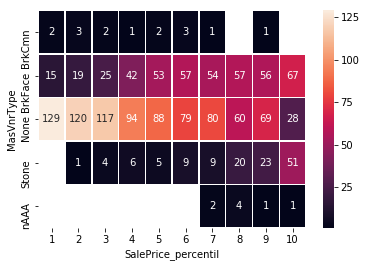

In [15]:
teste = df[['MasVnrType','SalePrice_percentil','Id']].copy()
teste.fillna('nAAA', inplace=True)

variavel = 'MasVnrType'
agg_dict = {'Id' : 'count'}
heatmap = teste.groupby([variavel,'SalePrice_percentil']).agg(agg_dict).copy()
heatmap.reset_index(inplace= True)
heatmap = heatmap.pivot(variavel,'SalePrice_percentil', 'Id').copy()
print('-------------------')
print('#NAs= '+str(df[variavel].isnull().sum()))
print(variavel)
print(sns.heatmap(heatmap, linewidths=.5, fmt='g',annot=True) )

In [16]:
df.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [17]:
colunas_categoric = []
for c in range(len(colunas_type)):
    if str(colunas_type[c]) == 'object':
        colunas_categoric.append(colunas_description[c])

In [18]:
df_cluster_ohe = pd.get_dummies(df[colunas_categoric].fillna(0), columns = colunas_categoric)

In [19]:
k_means = KMeans(n_clusters = 5)
k_means.fit(df_cluster_ohe)
df_cluster_ = pd.DataFrame(k_means.labels_, index = df_cluster_ohe.index, columns = ['cluster'])

In [20]:
df_cluster_.cluster.value_counts().sort_index()

0     81
1    524
2    289
3    340
4    226
Name: cluster, dtype: int64

#  

In [21]:
colunas = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
           'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea','GarageArea', 
           'WoodDeckSF','OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']

In [22]:
df_clusters_compara = pd.concat([df[colunas],df_cluster_],axis=1)

In [23]:
df_clusters_compara.fillna(0, inplace=True)

In [24]:
dict_ = {str(i): 'mean' for i in colunas}

In [25]:
df_clusters_centers = df_clusters_compara.groupby('cluster').agg(dict_).sort_values('SalePrice')
df_clusters_centers.T

cluster,0,3,4,2,1
LotFrontage,55.185185,58.026471,55.893805,49.508651,62.959924
LotArea,7469.679012,9430.776471,8802.973451,14474.411765,10249.015267
MasVnrArea,13.777778,61.967647,19.792035,129.003460,165.288168
BsmtFinSF1,240.382716,435.788235,150.982301,591.674740,524.730916
BsmtFinSF2,20.111111,79.123529,17.703540,91.467128,17.167939
BsmtUnfSF,507.234568,398.285294,634.880531,428.508651,733.484733
TotalBsmtSF,767.728395,913.197059,803.566372,1111.650519,1275.383588
1stFlrSF,915.716049,1045.502941,960.216814,1291.719723,1292.891221
2ndFlrSF,237.481481,131.355882,481.756637,329.636678,455.286260
LowQualFinSF,34.950617,0.682353,21.504425,1.557093,0.305344


In [26]:
# normalizando features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_clusters_compara.groupby('cluster').agg(dict_).sort_values('SalePrice'))

AxesSubplot(0.125,0.125;0.62x0.755)


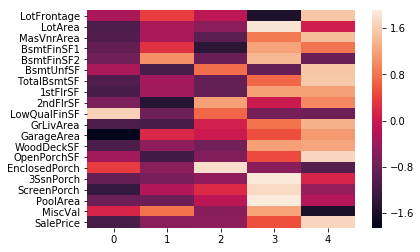

In [27]:
print(sns.heatmap(pd.DataFrame(X, columns=colunas).T))

In [28]:
colunas = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
           'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
           'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [29]:
df[colunas].shape

(1460, 19)

In [30]:
df[colunas].head(2)

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0


In [31]:
colunas = ['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1', 
          'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF', 
          'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','TotRmsAbvGrd',
           'Fireplaces','GarageYrBlt','GarageCars','GarageArea', 
          'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

In [32]:
df[colunas].shape

(1460, 29)

In [33]:
df_cluster_ohe.shape

(1460, 262)

In [34]:
result = pd.concat([df[colunas], df_cluster_ohe], axis=1)

In [35]:
result.shape

(1460, 291)

In [36]:
len(set(result.columns))

291

In [37]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [38]:
X_train, X_test, y_train, y_test = train_test_split(result.fillna(0), df_cluster_.cluster, random_state = 0,test_size=0.20)

In [39]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_train, y_train)

predicted_y = clf.predict(X_train)
print("Train")
print(metrics.accuracy_score(y_train, predicted_y))
print(" ")

predicted_y = clf.predict(X_test)
print("Test")
print(metrics.accuracy_score(y_test, predicted_y))

Train
0.6001712328767124
 
Test
0.5856164383561644


In [40]:
from sklearn.linear_model import LogisticRegression

X = X_train
y = y_train.values
lr = LogisticRegression(random_state=0)
lr.fit(X, y)

predicted_y = lr.predict(X_train)
print("Train")
print(metrics.accuracy_score(y_train.values, predicted_y))
print(" ")

predicted_y = lr.predict(X_test)
print("Test")
print(metrics.accuracy_score(y_test.values, predicted_y))

Train
0.9118150684931506
 
Test
0.8767123287671232


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=17, max_depth=60, random_state=0)
rf.fit(X_train.values, y_train.values)

predicted_y  = rf.predict(X_train.values)
print("Train")
print(metrics.accuracy_score(y_train.values, predicted_y))
print(" ")

predicted_y = rf.predict(X_test.values)
print("Test")
print(metrics.accuracy_score(y_test.values, predicted_y))

Train
0.9991438356164384
 
Test
0.9006849315068494


In [42]:
predict = rf.predict(result.fillna(0).values)

In [43]:
d = {'predict': predict, 'real_cluster': df_cluster_.cluster}
confere = pd.DataFrame(data=d)
confere['aux'] = 1

In [44]:
confere.head()

,predict,real_cluster,aux
0,1,1,1
1,2,2,1
2,1,1,1
3,4,4,1
4,1,1,1


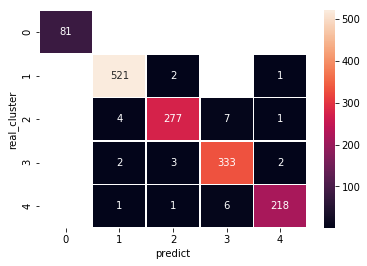

In [45]:
agg_dict = {'aux' : 'sum'}
heatmap = confere.groupby(['real_cluster','predict'],as_index=False).agg(agg_dict).copy()
heatmap = heatmap.pivot('real_cluster','predict', 'aux').copy()
sns.heatmap(heatmap, linewidths=.5, fmt='g',annot=True)